In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/content/Restaurant_Reviews.tsv',sep='\t')

In [4]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
data.shape

(1000, 2)

In [6]:
data.isnull().sum()

,0
Review,0
Liked,0


In [7]:
data['Liked'].value_counts()

,count
Liked,
1,500
0,500


In [8]:
import nltk

In [11]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
data['Review'].apply(lambda x : nltk.sent_tokenize(str()))

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [13]:
data['char_count']=data['Review'].apply(len)

In [14]:
data.head()

,Review,Liked,char_count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [15]:
data['word_count']=data['Review'].apply(lambda x :len(str(x).split()))

In [16]:
data.head()

,Review,Liked,char_count,word_count
0,Wow... Loved this place.,1,24,4
1,Crust is not good.,0,18,4
2,Not tasty and the texture was just nasty.,0,41,8
3,Stopped by during the late May bank holiday of...,1,87,15
4,The selection on the menu was great and so wer...,1,59,12


In [17]:
data[data['Liked']==1]['char_count'].mean()

55.898

In [18]:
data[data['Liked']==0]['char_count'].mean()

60.75

In [19]:
import re

In [20]:
data['Review'][1]

'Crust is not good.'

In [21]:
review = re.sub('[^a-zA-Z]',' ',data['Review'][1])

In [22]:
review

'Crust is not good '

In [23]:
review = review.lower()

In [24]:
review

'crust is not good '

In [25]:
review = review.split()

In [26]:
review

['crust', 'is', 'not', 'good']

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from nltk.corpus import stopwords

In [29]:
all_stopwords = stopwords.words("english")
all_stopwords.remove("not")
all_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [30]:
review = [word for word in review if word not in set(all_stopwords)]

In [31]:
review

['crust', 'not', 'good']

In [32]:
from nltk.stem.porter import PorterStemmer


In [33]:
ps = PorterStemmer()

In [34]:
review = [ps.stem(word) for word in review]

In [35]:
review = " ".join(review)


In [36]:
review

'crust not good'

In [37]:
import re
custom_stopwords = {"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',"mightn't",'mustn',"mustn't",'needn',"needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't"}
corpus = []
ps = PorterStemmer()
stop_words = set(stopwords.words("english")) - custom_stopwords
for i in range(len(data)):
  review = re.sub('[^a-zA-Z]',' ',data['Review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if word not in stop_words]
  review = " ".join(review)
  corpus.append(review)





In [38]:
data['processed_text']=corpus

In [39]:
data.head()

,Review,Liked,char_count,word_count,processed_text
0,Wow... Loved this place.,1,24,4,wow love place
1,Crust is not good.,0,18,4,crust good
2,Not tasty and the texture was just nasty.,0,41,8,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,select menu great price


In [40]:
from wordcloud import WordCloud

In [41]:
wc = WordCloud(width=500,height=500,min_font_size=8,background_color="white")


In [42]:
pos = wc.generate(data[data['Liked']==1]['processed_text'].str.cat(sep=" "))

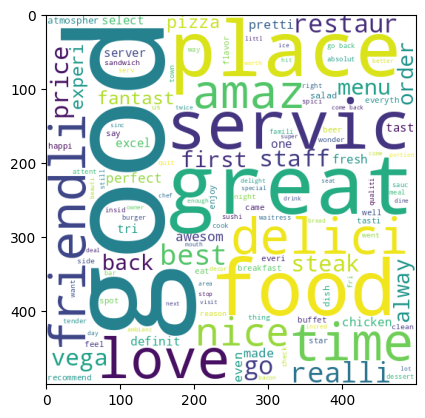

In [43]:
plt.imshow(pos)

In [44]:
neg = wc.generate(data[data['Liked']==0]['processed_text'].str.cat(sep=" "))

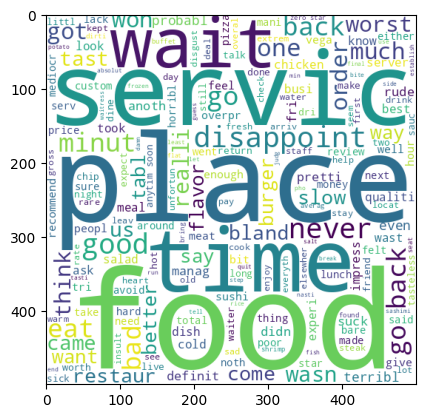

In [45]:
plt.imshow(neg)

In [46]:
data.head()

,Review,Liked,char_count,word_count,processed_text
0,Wow... Loved this place.,1,24,4,wow love place
1,Crust is not good.,0,18,4,crust good
2,Not tasty and the texture was just nasty.,0,41,8,tasti textur nasti
3,Stopped by during the late May bank holiday of...,1,87,15,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,59,12,select menu great price


In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
cv = CountVectorizer(max_features=1500)

In [49]:
x = cv.fit_transform(corpus).toarray()

In [50]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [51]:
x.shape

(1000, 1500)

In [52]:
y = data['Liked']

In [53]:
y

,Liked
0,1
1,0
2,0
3,1
4,1
...,...
995,0
996,0
997,0
998,0


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score

In [59]:
accuracy_score(y_test,y_pred)

0.68

In [60]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.755

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)


0.735

In [62]:
import joblib

In [63]:
joblib.dump(rf,'Restaurant_review_model')

['Restaurant_review_model']

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import zipfile
import os


In [65]:
df = pd.read_csv('/content/Restaurant_Reviews.tsv', delimiter='\t')
df.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


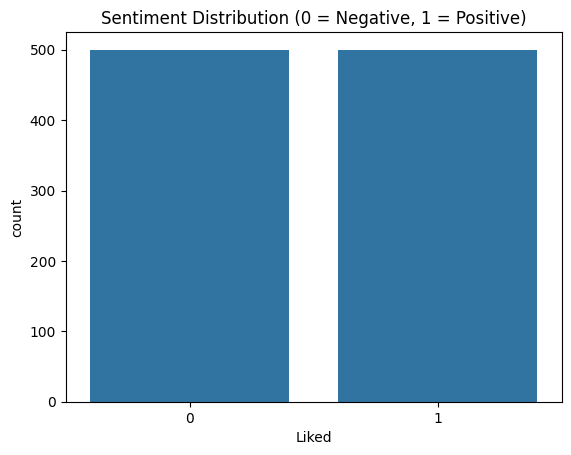

In [66]:
sns.countplot(x='Liked', data=df)
plt.title('Sentiment Distribution (0 = Negative, 1 = Positive)')
plt.show()


In [67]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Review'])
y = df['Liked']


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       152
           1       0.82      0.79      0.81       148

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



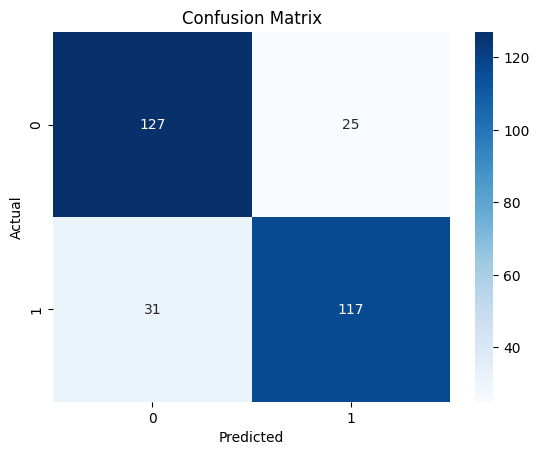

In [70]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [71]:
import ipywidgets as widgets
from IPython.display import display

# Assume these are already defined:
# vectorizer = Your CountVectorizer instance
# model = Your trained sentiment classification model

# Function to predict sentiment based on input review
def predict_sentiment(review):
    # Transform the input review using the vectorizer
    input_vector = vectorizer.transform([review])

    # Predict sentiment
    prediction = model.predict(input_vector)[0]

    # Return the sentiment prediction
    return "Positive" if prediction == 1 else "Negative"

# Text input widget
review_input = widgets.Text(
    placeholder='Enter your review here...',
    description='Review:',
    disabled=False
)

# Dropdown widget for sample reviews
sample_reviews = [
    "Wow... Loved this place.",
    "Crust is not good.",
    "Not tasty and the texture was just nasty.",
    "Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.",
    "The selection on the menu was great and so were the prices.",
    "Now I am getting angry and I want my damn pho.",
    "Honeslty it didn't taste THAT fresh.",
    "The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.",
    "The fries were great too.",
    "A great touch.",
    "Service was very prompt.",
    "Would not go back.",
    "The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.",
    "I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!",
    "I was disgusted because I was pretty sure that was human hair.",
    "I was shocked because no signs indicate cash only.",
    "Highly recommended.",
    "Waitress was a little slow in service.",
    "This place is not worth your time, let alone Vegas.",
    "did not like at all.",
    "The Burrittos Blah!",
    "The food, amazing.",
    "Service is also cute.",
    "I could care less... The interior is just beautiful.",
    "So they performed.",
    "That's right....the red velvet cake.....ohhh this stuff is so good.",
    "- They never brought a salad we asked for.",
    "This hole in the wall has great Mexican street tacos, and friendly staff.",
    "Took an hour to get our food only 4 tables in restaurant my food was Luke warm, Our sever was running around like he was totally overwhelmed.",
    "The worst was the salmon sashimi.",
    "Also there are combos like a burger, fries, and beer for 23 which is a decent deal.",
    "This was like the final blow!",
    "I found this place by accident and I could not be happier.",
    "seems like a good quick place to grab a bite of some familiar pub food, but do yourself a favor and look elsewhere.",
    "Overall, I like this place a lot.",
    "The only redeeming quality of the restaurant was that it was very inexpensive.",
    "Ample portions and good prices.",
    "Poor service, the waiter made me feel like I was stupid every time he came to the table.",
    "My first visit to Hiro was a delight!",
    "Service sucks.",
    "The shrimp tender and moist.",
    "There is not a deal good enough that would drag me into that establishment again.",
    "Hard to judge whether these sides were good because we were grossed out by the melted styrofoam and didn't want to eat it for fear of getting sick.",
    "On a positive note, our server was very attentive and provided great service.",
    "Frozen pucks of disgust, with some of the worst people behind the register.",
    "The only thing I did like was the prime rib and dessert section.",
    "It's too bad the food is so damn generic.",
    "The burger is good beef, cooked just right.",
    "If you want a sandwich just go to any Firehouse!!!!!"
]


dropdown = widgets.Dropdown(
    options=sample_reviews,
    description='Sample Reviews:',
    disabled=False
)

def on_dropdown_change(change):
    review_input.value = change['new']

dropdown.observe(on_dropdown_change, names='value')

# Button widgets for clearing and submitting reviews
submit_button = widgets.Button(description='Submit')

def on_submit_button_click(b):
    with output:
        output.clear_output()
        if review_input.value:
            prediction = predict_sentiment(review_input.value)
            print(f"Predicted Sentiment: {prediction}")
        else:
            print("Please enter a review before submitting.")

submit_button.on_click(on_submit_button_click)

# Output widget for displaying predictions
output = widgets.Output()

# Display widgets
display(widgets.VBox([review_input, dropdown, submit_button]))
display(output)


Output()

In [72]:
import joblib
joblib.dump(model, 'Restaurant_review_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')


['vectorizer.pkl']

In [75]:
# Function to predict sentiment
def predict_sentiment(review):
    input_vector = vectorizer.transform([review])
    prediction = model.predict(input_vector)[0]
    return "Positive" if prediction == 1 else "Negative"

# Text input widget
review_input = widgets.Text(
    placeholder='Enter your review here...',
    description='Review:',
    disabled=False
)

# Button widget for submitting reviews
submit_button = widgets.Button(description='Submit')

def on_submit_button_click(b):
    with output:
        output.clear_output()
        if review_input.value:
            prediction = predict_sentiment(review_input.value)
            print(f"Predicted Sentiment: {prediction}")
        else:
            print("Please enter a review before submitting.")

submit_button.on_click(on_submit_button_click)

# Output widget for displaying predictions
output = widgets.Output()

# Display widgets
display(widgets.VBox([review_input, submit_button]))
display(output)

Output()